# Q1

Get the dataset from this URL - https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
import pandas as pd

In [ ]:
#reading the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv',error_bad_lines=False)
df = df.iloc[:,1:]
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
#taking only the review text and rating column
df = df[['Review Text','Rating']]
df.shape

(23486, 2)

In [ ]:
print(sum(df['Review Text'].isna()))
print(sum(df['Rating'].isna()))
#removing NaN values
df = df[df['Review Text'].notna()]
df

845
0


,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [ ]:
#preprocessing 'Rating' column as 'Positive','Negative','Neutral'
df.loc[df['Rating'] == 5,'Rating']='Positive'
df.loc[df['Rating'] == 4,'Rating']='Positive'
df.loc[df['Rating'] == 3,'Rating']='Neutral'
df.loc[df['Rating'] == 2,'Rating']='Negative'
df.loc[df['Rating'] == 1,'Rating']='Negative'
df

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive
2,I had such high hopes for this dress and reall...,Neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,This shirt is very flattering to all due to th...,Positive
...,...,...
23481,I was very happy to snag this dress at such a ...,Positive
23482,"It reminds me of maternity clothes. soft, stre...",Neutral
23483,"This fit well, but the top was very see throug...",Neutral
23484,I bought this dress for a wedding i have this ...,Neutral


In [ ]:
#randomly selecting 10000 rows
df = df.sample(10000,random_state=42)
df

,Review Text,Rating
13365,This sweater is so beautiful on. it is thick m...,Positive
19834,This piece is almost what i want... i tried on...,Positive
18722,Really like this blouse but am returning for a...,Positive
10635,These are the perfect light weight relaxing su...,Positive
7348,These look nothing like the picture! they are ...,Negative
...,...,...
6503,I ordered the mustard shade in size xl. it is ...,Positive
21602,"I love this dress! very comfortable fit, and l...",Positive
9695,"I expected this dress to be pretty, but was ha...",Positive
23079,I'd say these are exactly as-pictured and i'm ...,Positive


In [ ]:
#checking distribution of labels
df['Rating'].value_counts()

Positive    7703
Neutral     1289
Negative    1008
Name: Rating, dtype: int64

In [ ]:
#train-validation-test split
from sklearn.model_selection import train_test_split

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0], df.iloc[:,1], test_size=1 - train_ratio, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=42)

In [ ]:
#distribution of train labels
y_train.value_counts()

Positive    4619
Neutral      766
Negative     615
Name: Rating, dtype: int64

In [ ]:
#distribution of validation labels
y_val.value_counts()

Positive    1546
Neutral      268
Negative     186
Name: Rating, dtype: int64

In [ ]:
#distribution of test labels
y_test.value_counts()

Positive    1538
Neutral      255
Negative     207
Name: Rating, dtype: int64

# Q2

In [ ]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ayanabha\\anaconda3\\Lib\\site-packages\\~ydantic\\annotated_types.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
#NLP pipeline using spacy
import spacy
nlp = spacy.load("en_core_web_sm")

def text_pipeline_spacy(text):
    res = []
    doc = nlp(text)
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            res.append(token.lemma_.lower()) #getting the lowercase lemmatized version of the token
    return ' '.join(res)

In [ ]:
#running the train, validation and test sets through the NLP pipeline
train_corpus = []
validation_corpus = []
test_corpus = []

for doc in list(x_train):
    train_corpus.append(text_pipeline_spacy(doc))
for doc in list(x_val):
    validation_corpus.append(text_pipeline_spacy(doc))
for doc in list(x_test):
    test_corpus.append(text_pipeline_spacy(doc))

In [ ]:
#getting the TFIDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(train_corpus)
tfidf_val = vectorizer.transform(validation_corpus)
tfidf_test = vectorizer.transform(test_corpus)

In [ ]:
import random
import numpy as np

In [ ]:
class KMeans_from_scratch():
    
    def __init__(self,data,k):
        self.data = data #list of sparse tfidf vectors
        self.k = k #no. of clusters
    
    def get_centroid(cluster_data):
        return list(np.mean(cluster_data,axis=0)) #mean of all cluster points
    
    def get_distance(point1,point2):
        return np.linalg.norm(point1 - point2) #euclidean distance between two points
    
    def execute(self):
        #centroid initialization
        random.seed(42)
        initial_indices = random.sample(range(0,self.data.shape[0]),self.k)
        centroids = [list(self.data[idx]) for idx in initial_indices]
        iter_count = 1
        #clustering process
        while(True):
            cluster_assignments = {}
            for i,point in enumerate(self.data):
                distances = [KMeans_from_scratch.get_distance(centroid,point) for centroid in centroids] #calculating distance from each cluster centroid
                #assigning point to nearest cluster
                closest_cluster_idx = np.argmin(distances)
                if closest_cluster_idx not in cluster_assignments.keys():
                    cluster_assignments[closest_cluster_idx] = [i]
                else:
                    cluster_assignments[closest_cluster_idx].append(i)
            #calculating new centroids
            new_centroids = [KMeans_from_scratch.get_centroid(self.data[cluster_assignments[i]]) for i in sorted(cluster_assignments)]
            print('Iteration ',iter_count)
            iter_count += 1
            if new_centroids == centroids:
                break
            else:
                centroids = new_centroids
        self.cluster_assignments = cluster_assignments
        self.centroids = new_centroids
    
    def get_assignments(self): #no. of points in each cluster
        for i in self.cluster_assignments.keys():
            print(i,': ',len(self.cluster_assignments[i]))

In [ ]:
obj = KMeans_from_scratch(tfidf_train.toarray(),5)

In [ ]:
obj.execute()

Iteration  1
Iteration  2
Iteration  3
Iteration  4
Iteration  5
Iteration  6
Iteration  7
Iteration  8
Iteration  9
Iteration  10
Iteration  11
Iteration  12
Iteration  13
Iteration  14
Iteration  15
Iteration  16
Iteration  17
Iteration  18
Iteration  19
Iteration  20
Iteration  21
Iteration  22
Iteration  23
Iteration  24
Iteration  25
Iteration  26
Iteration  27
Iteration  28


In [ ]:
obj.get_assignments()

2 :  2007
3 :  1010
0 :  1458
4 :  870
1 :  655


In [ ]:
tokens = vectorizer.get_feature_names_out() #tokens used as features in calculating TFIDF

In [ ]:
example_docs = {}
random.seed(42)
for i in range(len(obj.cluster_assignments)):
    docs = [list(x_train)[idx] for idx in random.sample(obj.cluster_assignments[i],5)]
    example_docs[i] = docs

In [ ]:
example_docs

{0: ['Comments. the detail is lovely - especially the dragonflies on the sleeve. and the quality is there with the lining. trouble is this is thick fabric cut in a box shape. imo, you have to be very skinny to pull this off and not look like a tank. i looked at the model (after purchasing) and notice that she has it open and swept back a bit bc if it is not, it is terribly unflattering.',
  "As a curvy, short gal, finding a nice button down that isn't boxy or way too low cut is like finding a gem. this shirt is perfect for work, and i love how flattering it is. my only reservation is that it is more sheer than i would like, and so i need a camisole with it. i wish this style came in more colors!",
  'I\'m 5\'-4", 130lbs with a 32f chest. this dress looked like a cross between little house on the prairie and a mu mu. i can\'t imagine this looking good on anyone who isn\'t 7\' tall. also, the straight across, rather high neck line wasn\'t flattering to a large chest and then the arm hole

In [ ]:
top_tokens = {}
for i in range(len(obj.centroids)):
    a = obj.centroids[i]
    top_tokens[i] = tokens[[x[0] for x in sorted(enumerate(a), key=lambda x: x[1])[-5:]]]

In [ ]:
top_tokens #top tokens for each cluster

{0: array(['size', 'short', 'fit', 'look', 'like'], dtype=object),
 1: array(['color', 'fit', 'look', 'love', 'great'], dtype=object),
 2: array(['buy', 'sweater', 'color', 'wear', 'love'], dtype=object),
 3: array(['size', 'fit', 'wear', 'love', 'dress'], dtype=object),
 4: array(['order', 'large', 'run', 'size', 'small'], dtype=object)}

In [ ]:
confusion_matrix = {'Positive':[],'Neutral':[],'Negative':[]}
for i in range(len(obj.cluster_assignments)):
    cluster_counts = pd.Series([list(y_train)[idx] for idx in obj.cluster_assignments[i]]).value_counts()
    confusion_matrix['Positive'].append(cluster_counts['Positive'])
    confusion_matrix['Neutral'].append(cluster_counts['Neutral'])
    confusion_matrix['Negative'].append(cluster_counts['Negative'])

In [ ]:
pd.DataFrame(confusion_matrix)

,Positive,Neutral,Negative
0,887,311,260
1,615,29,11
2,1679,167,161
3,796,124,90
4,642,135,93


# Q3

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

### 'most frequent' strategy

In [ ]:
model_freq = DummyClassifier(strategy="most_frequent")
model_freq.fit(train_corpus, y_train)
y_pred = model_freq.predict(validation_corpus)

most_freq_acc = accuracy_score(y_val,y_pred)*100
most_freq_prec = precision_score(y_val,y_pred,average='macro')*100
most_freq_rec = recall_score(y_val,y_pred,average='macro')*100
most_freq_f1 = f1_score(y_val,y_pred,average='macro')*100
print('Validation Data')
print('Accuracy: ',most_freq_acc,'%')
print('Precision: %.3f'%most_freq_prec,'%')
print('Recall: %.3f'%most_freq_rec,'%')
print('F1 Score: %.3f'%most_freq_f1,'%')

Validation Data
Accuracy:  77.3 %
Precision: 25.767 %
Recall: 33.333 %
F1 Score: 29.066 %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 'stratified' strategy

In [ ]:
model_strat = DummyClassifier(strategy="stratified",random_state=42)
model_strat.fit(train_corpus, y_train)
y_pred = model_strat.predict(validation_corpus)

strat_acc = accuracy_score(y_val,y_pred)*100
strat_prec = precision_score(y_val,y_pred,average='macro')*100
strat_rec = recall_score(y_val,y_pred,average='macro')*100
strat_f1 = f1_score(y_val,y_pred,average='macro')*100
print('Validation Data')
print('Accuracy: ',strat_acc,'%')
print('Precision: %.3f'%strat_prec,'%')
print('Recall: %.3f'%strat_rec,'%')
print('F1 Score: %.3f'%strat_f1,'%')

Validation Data
Accuracy:  62.3 %
Precision: 33.378 %
Recall: 33.349 %
F1 Score: 33.359 %


### Logistic regression with one-hot vectorization

In [ ]:
from sklearn.preprocessing import OneHotEncoder
vectorizer = OneHotEncoder(handle_unknown = 'ignore')
onehot_train = vectorizer.fit_transform(pd.DataFrame(train_corpus))
onehot_val = vectorizer.transform(pd.DataFrame(validation_corpus))

In [ ]:
model_log_onehot = LogisticRegression()
model_log_onehot.fit(onehot_train, y_train)
y_pred = model_log_onehot.predict(onehot_val)

log_onehot_acc = accuracy_score(y_val,y_pred)*100
log_onehot_prec = precision_score(y_val,y_pred,average='macro')*100
log_onehot_rec = recall_score(y_val,y_pred,average='macro')*100
log_onehot_f1 = f1_score(y_val,y_pred,average='macro')*100
print('Validation Data')
print('Accuracy: ',log_onehot_acc,'%')
print('Precision: %.3f'%log_onehot_prec,'%')
print('Recall: %.3f'%log_onehot_rec,'%')
print('F1 Score: %.3f'%log_onehot_f1,'%')

Validation Data
Accuracy:  77.3 %
Precision: 25.767 %
Recall: 33.333 %
F1 Score: 29.066 %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic regression with tfidf vectorization

In [ ]:
model_log_tfidf = LogisticRegression()
model_log_tfidf.fit(tfidf_train, y_train)
y_pred = model_log_tfidf.predict(tfidf_val)

log_tfidf_acc = accuracy_score(y_val,y_pred)*100
log_tfidf_prec = precision_score(y_val,y_pred,average='macro')*100
log_tfidf_rec = recall_score(y_val,y_pred,average='macro')*100
log_tfidf_f1 = f1_score(y_val,y_pred,average='macro')*100
print('Validation Data')
print('Accuracy: ',log_tfidf_acc,'%')
print('Precision: %.3f'%log_tfidf_prec,'%')
print('Recall: %.3f'%log_tfidf_rec,'%')
print('F1 Score: %.3f'%log_tfidf_f1,'%')

Validation Data
Accuracy:  81.2 %
Precision: 63.142 %
Recall: 48.847 %
F1 Score: 51.953 %


### SVC with one-hot vectorization

In [ ]:
model_svc = SVC()
model_svc.fit(onehot_train, y_train)
y_pred = model_svc.predict(onehot_val)

svc_acc = accuracy_score(y_val,y_pred)*100
svc_prec = precision_score(y_val,y_pred,average='macro')*100
svc_rec = recall_score(y_val,y_pred,average='macro')*100
svc_f1 = f1_score(y_val,y_pred,average='macro')*100
print('Validation Data')
print('Accuracy: ',svc_acc,'%')
print('Precision: %.3f'%svc_prec,'%')
print('Recall: %.3f'%svc_rec,'%')
print('F1 Score: %.3f'%svc_f1,'%')

Validation Data
Accuracy:  77.3 %
Precision: 25.767 %
Recall: 33.333 %
F1 Score: 29.066 %


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier_results = pd.DataFrame({'Accuracy(%)':[most_freq_acc,strat_acc,log_onehot_acc,log_tfidf_acc,svc_acc],
                                  'Precision(%)':['%.3f'%most_freq_prec,'%.3f'%strat_prec,'%.3f'%log_onehot_prec,'%.3f'%log_tfidf_prec,'%.3f'%svc_prec],
                                  'Recall(%)':['%.3f'%most_freq_rec,'%.3f'%strat_rec,'%.3f'%log_onehot_rec,'%.3f'%log_tfidf_rec,'%.3f'%svc_rec],
                                  'F1 Score(%)':['%.3f'%most_freq_f1,'%.3f'%strat_f1,'%.3f'%log_onehot_f1,'%.3f'%log_tfidf_f1,'%.3f'%svc_f1]},
                                 index=['Dummy classifier - most frequent','Dummy classifier - stratified','Logistic Regression - onehot','Logistic Regression - tfidf','SVC - onehot'])
classifier_results

,Accuracy(%),Precision(%),Recall(%),F1 Score(%)
Dummy classifier - most frequent,77.3,25.767,33.333,29.066
Dummy classifier - stratified,62.3,33.378,33.349,33.359
Logistic Regression - onehot,77.3,25.767,33.333,29.066
Logistic Regression - tfidf,81.2,63.142,48.847,51.953
SVC - onehot,77.3,25.767,33.333,29.066


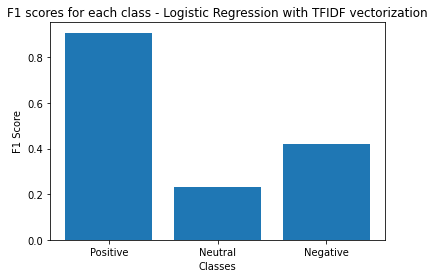

In [ ]:
import matplotlib.pyplot as plt
classifier_report = classification_report(y_val,model_log_tfidf.predict(tfidf_val),output_dict=True)
f1_scores = [classifier_report['Positive']['f1-score'],classifier_report['Neutral']['f1-score'],classifier_report['Negative']['f1-score']]
classes = ['Positive','Neutral','Negative']
plt.bar(classes,f1_scores)
plt.xlabel('Classes')
plt.ylabel('F1 Score')
plt.title('F1 scores for each class - Logistic Regression with TFIDF vectorization')
plt.show()

### own vectorization/normalization/classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
count_train = vectorizer.fit_transform(train_corpus)
count_val = vectorizer.transform(validation_corpus)

model = AdaBoostClassifier()
model.fit(count_train,y_train)
y_pred = model.predict(count_val)

print('Accuracy: ',accuracy_score(y_pred,y_val)*100,'%')
print('Precision: %.3f'%(precision_score(y_pred,y_val,average='macro')*100),'%')
print('Recall: %.3f'%(recall_score(y_pred,y_val,average='macro')*100),'%')
print('F1 Score: %.3f'%(f1_score(y_pred,y_val,average='macro')*100),'%')

Accuracy:  78.7 %
Precision: 45.891 %
Recall: 53.777 %
F1 Score: 47.440 %


In [ ]:
classifier_results = pd.DataFrame({'Accuracy(%)':[most_freq_acc,strat_acc,log_onehot_acc,log_tfidf_acc,svc_acc,accuracy_score(y_pred,y_val)*100],
                                  'Precision(%)':['%.3f'%most_freq_prec,'%.3f'%strat_prec,'%.3f'%log_onehot_prec,'%.3f'%log_tfidf_prec,'%.3f'%svc_prec,'%.3f'%(precision_score(y_pred,y_val,average='macro')*100)],
                                  'Recall(%)':['%.3f'%most_freq_rec,'%.3f'%strat_rec,'%.3f'%log_onehot_rec,'%.3f'%log_tfidf_rec,'%.3f'%svc_rec,'%.3f'%(recall_score(y_pred,y_val,average='macro')*100)],
                                  'F1 Score(%)':['%.3f'%most_freq_f1,'%.3f'%strat_f1,'%.3f'%log_onehot_f1,'%.3f'%log_tfidf_f1,'%.3f'%svc_f1,'%.3f'%(f1_score(y_pred,y_val,average='macro')*100)]},
                                 index=['Dummy classifier - most frequent','Dummy classifier - stratified','Logistic Regression - onehot','Logistic Regression - tfidf','SVC - onehot','AdaBoost - CountVectorizer'])
classifier_results

,Accuracy(%),Precision(%),Recall(%),F1 Score(%)
Dummy classifier - most frequent,77.3,25.767,33.333,29.066
Dummy classifier - stratified,62.3,33.378,33.349,33.359
Logistic Regression - onehot,77.3,25.767,33.333,29.066
Logistic Regression - tfidf,81.2,63.142,48.847,51.953
SVC - onehot,77.3,25.767,33.333,29.066
AdaBoost - CountVectorizer,78.7,45.891,53.777,47.440


# Q4

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#defining range of hyperparameter values
tfidf_params = {'max_features':[1000,3000,5000],
                'sublinear_tf':[True,False],
                'ngram_range':[(1,2),(1,3)]}
logistic_params = {'C':[0.1,1,10,100]}

tfidf_param_grid = ParameterGrid(tfidf_params)
logistic_param_grid = ParameterGrid(logistic_params)

In [ ]:
best_accuracy = 0
best_f1 = 0
best_hyperparameters = {}

for tfidf_hyperparameters in tfidf_param_grid:
    for logistic_hyperparameters in logistic_param_grid:

        tfidf_vectorizer = TfidfVectorizer(**tfidf_hyperparameters)
        model = LogisticRegression(**logistic_hyperparameters)
        
        pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('logistic_regression', model)])
        
        pipeline.fit(train_corpus, y_train)
        
        y_pred = pipeline.predict(validation_corpus)
        val_accuracy = accuracy_score(y_val, y_pred)
        val_f1 = f1_score(y_val,y_pred,average='macro')
        
        if val_accuracy > best_accuracy and val_f1 > best_f1: #get the hyperparameters that obtains both higher accuracy and F1 score
            best_accuracy = val_accuracy
            best_f1 = val_f1
            best_hyperparameters = {'tfidf': tfidf_hyperparameters, 'logistic_regression': logistic_hyperparameters}
            print('TFIDF hyperparameters: ',tfidf_hyperparameters)
            print('Logistic regression hyperparameters: ',logistic_hyperparameters)
            print('Accuracy: %.3f'%(best_accuracy*100))
            print('F1 score: %.3f'%(best_f1*100))
            print('\n')

TFIDF hyperparameters:  {'max_features': 1000, 'ngram_range': (1, 2), 'sublinear_tf': True}
Logistic regression hyperparameters:  {'C': 0.1}
Accuracy: 77.600
F1 score: 31.162


TFIDF hyperparameters:  {'max_features': 1000, 'ngram_range': (1, 2), 'sublinear_tf': True}
Logistic regression hyperparameters:  {'C': 1}
Accuracy: 81.000
F1 score: 52.821


TFIDF hyperparameters:  {'max_features': 1000, 'ngram_range': (1, 3), 'sublinear_tf': True}
Logistic regression hyperparameters:  {'C': 1}
Accuracy: 81.150
F1 score: 53.071


TFIDF hyperparameters:  {'max_features': 3000, 'ngram_range': (1, 2), 'sublinear_tf': True}
Logistic regression hyperparameters:  {'C': 1}
Accuracy: 81.650
F1 score: 53.458


TFIDF hyperparameters:  {'max_features': 5000, 'ngram_range': (1, 3), 'sublinear_tf': True}
Logistic regression hyperparameters:  {'C': 1}
Accuracy: 81.750
F1 score: 53.545




In [ ]:
#create model on best hyperparameters
best_tfidf_vectorizer = TfidfVectorizer(**best_hyperparameters['tfidf'])
best_log_model = LogisticRegression(**best_hyperparameters['logistic_regression'])
best_pipeline = Pipeline([('tfidf', best_tfidf_vectorizer), ('logistic_regression', best_log_model)])

In [ ]:
best_pipeline.fit(train_corpus,y_train)
y_pred = best_pipeline.predict(validation_corpus)

best_log_tfidf_acc = accuracy_score(y_val,y_pred)*100
best_log_tfidf_prec = precision_score(y_val,y_pred,average='macro')*100
best_log_tfidf_rec = recall_score(y_val,y_pred,average='macro')*100
best_log_tfidf_f1 = f1_score(y_val,y_pred,average='macro')*100
print('Validation Data')
print('Accuracy: ',best_log_tfidf_acc,'%')
print('Precision: %.3f'%best_log_tfidf_prec,'%')
print('Recall: %.3f'%best_log_tfidf_rec,'%')
print('F1 Score: %.3f'%best_log_tfidf_f1,'%')

Validation Data
Accuracy:  81.75 %
Precision: 66.750 %
Recall: 49.921 %
F1 Score: 53.545 %


In [ ]:
classifier_results = pd.DataFrame({'Accuracy(%)':[log_tfidf_acc,best_log_tfidf_acc],
                                  'Precision(%)':['%.3f'%log_tfidf_prec,'%.3f'%best_log_tfidf_prec],
                                  'Recall(%)':['%.3f'%log_tfidf_rec,'%.3f'%best_log_tfidf_rec],
                                  'F1 Score(%)':['%.3f'%log_tfidf_f1,'%.3f'%best_log_tfidf_f1]},
                                 index=['Baseline Logistic Regression - tfidf','Tuned Logistic Regression - tfidf'])
classifier_results

,Accuracy(%),Precision(%),Recall(%),F1 Score(%)
Baseline Logistic Regression - tfidf,81.20,63.142,48.847,51.953
Tuned Logistic Regression - tfidf,81.75,66.750,49.921,53.545


# Q5

In [ ]:
!pip install transformers datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━

a) Logistic Regression with Context Vectors

In [ ]:
from transformers import pipeline

feature_extractor = pipeline(model='roberta-base',task='feature-extraction')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#getting the context-vectors
context_vectors_train = []
context_vectors_val = []
context_vectors_test = []

for i,doc in enumerate(list(train_corpus)):
    features = feature_extractor(doc)
    print(i)
    context_vectors_train.append(features[0][0])

for i,doc in enumerate(list(validation_corpus)):
    features = feature_extractor(doc)
    print(i)
    context_vectors_val.append(features[0][0])

for i,doc in enumerate(list(test_corpus)):
    features = feature_extractor(doc)
    print(i)
    context_vectors_test.append(features[0][0])

Streaming output truncated to the last 5000 lines.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189

In [ ]:
model = LogisticRegression()
model.fit(np.array(context_vectors_train),y_train)
y_pred = model.predict(np.array(context_vectors_val))

print('Accuracy: ',accuracy_score(y_pred,y_val)*100,'%')
print('Precision: %.3f'%(precision_score(y_pred,y_val,average='macro')*100),'%')
print('Recall: %.3f'%(recall_score(y_pred,y_val,average='macro')*100),'%')
print('F1 Score: %.3f'%(f1_score(y_pred,y_val,average='macro')*100),'%')

Accuracy:  79.55 %
Precision: 46.326 %
Recall: 58.973 %
F1 Score: 48.712 %


b) End-to-end classifier in BERT

In [ ]:
from datasets import Dataset
import evaluate

In [ ]:
#replacing the labels with numerical values
train_data = pd.DataFrame({'review':list(x_train),'label':list(y_train)})
train_data['label'].replace(['Positive','Neutral','Negative'],
                        [0, 1,2], inplace=True)
val_data = pd.DataFrame({'review':list(x_val),'label':list(y_val)})
val_data['label'].replace(['Positive','Neutral','Negative'],
                        [0, 1,2], inplace=True)
test_data = pd.DataFrame({'review':list(x_test),'label':list(y_test)})
test_data['label'].replace(['Positive','Neutral','Negative'],
                        [0, 1,2], inplace=True)

In [ ]:
#converting to HuggingFace dataset
hg_train_data = Dataset.from_pandas(train_data)
hg_val_data = Dataset.from_pandas(val_data)
hg_test_data = Dataset.from_pandas(test_data)

In [ ]:
#tokenizing the data
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_dataset(data):
    return tokenizer(data["review"], 
                     max_length=32, 
                     truncation=True, 
                     padding="max_length")

# Tokenize the dataset
dataset_train = hg_train_data.map(tokenize_dataset)
dataset_val = hg_val_data.map(tokenize_dataset)
dataset_test = hg_test_data.map(tokenize_dataset)

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
#getting the pretrained model
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=3)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

In [ ]:
#defining the training hyperparameters
training_args = TrainingArguments(
    output_dir = './results',
    evaluation_strategy='epoch',
    num_train_epochs = 1,
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=16,
    learning_rate = 1e-4,
    weight_decay = 0
)

In [ ]:
#defining the metric to be used for evaluation
import numpy as np
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
#training the data
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_val,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.692497,0.773000


TrainOutput(global_step=375, training_loss=0.7152774251302083, metrics={'train_runtime': 2678.2579, 'train_samples_per_second': 2.24, 'train_steps_per_second': 0.14, 'total_flos': 98667531648000.0, 'train_loss': 0.7152774251302083, 'epoch': 1.0})

In [ ]:
#getting the predictions
import tensorflow as tf
y_val_predict = trainer.predict(dataset_val)
y_val_logits = y_val_predict.predictions
y_val_probabilities = tf.nn.softmax(y_val_logits)
y_val_pred_labels = np.argmax(y_val_probabilities, axis=1)
y_val_actual_labels = y_val_predict.label_ids

In [ ]:
#calculating the other metrics
metric_accuracy = evaluate.load("accuracy")
print(metric_accuracy.compute(predictions=y_val_pred_labels, references=y_val_actual_labels))
metric_f1 = evaluate.load("f1")
print(metric_f1.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_recall = evaluate.load("recall")
print(metric_recall.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_precision = evaluate.load("precision")
print(metric_precision.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))

{'accuracy': 0.773}


{'f1': 0.2906561383718744}


{'recall': 0.3333333333333333}


{'precision': 0.25766666666666665}


c) Hyperparameter tuning for end-to-end classifier

Hyperparameter Set 1

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_dataset(data):
    return tokenizer(data["review"], 
                     max_length=64, 
                     truncation=True, 
                     padding="max_length")

# Tokenize the dataset
dataset_train = hg_train_data.map(tokenize_dataset)
dataset_val = hg_val_data.map(tokenize_dataset)
dataset_test = hg_test_data.map(tokenize_dataset)

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=3)


training_args = TrainingArguments(
    output_dir = './results',
    evaluation_strategy='epoch',
    num_train_epochs = 2,
    per_device_train_batch_size=64,  
    per_device_eval_batch_size=64,
    learning_rate = 1e-4,
    weight_decay = 0
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_val,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.421342,0.818500
2,No log,0.385242,0.837500


TrainOutput(global_step=188, training_loss=0.48639171681505566, metrics={'train_runtime': 134.9802, 'train_samples_per_second': 88.902, 'train_steps_per_second': 1.393, 'total_flos': 394670126592000.0, 'train_loss': 0.48639171681505566, 'epoch': 2.0})

In [ ]:
import tensorflow as tf
y_val_predict = trainer.predict(dataset_val)
y_val_logits = y_val_predict.predictions
y_val_probabilities = tf.nn.softmax(y_val_logits)
y_val_pred_labels = np.argmax(y_val_probabilities, axis=1)
y_val_actual_labels = y_val_predict.label_ids

metric_accuracy = evaluate.load("accuracy")
print(metric_accuracy.compute(predictions=y_val_pred_labels, references=y_val_actual_labels))
metric_f1 = evaluate.load("f1")
print(metric_f1.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_recall = evaluate.load("recall")
print(metric_recall.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_precision = evaluate.load("precision")
print(metric_precision.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))

{'accuracy': 0.8375}


{'f1': 0.6444948602776379}


{'recall': 0.6287432899074852}


{'precision': 0.6637353138843286}


Hyperparameter Set 2

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_dataset(data):
    return tokenizer(data["review"], 
                     max_length=64, 
                     truncation=True, 
                     padding="max_length")

# Tokenize the dataset
dataset_train = hg_train_data.map(tokenize_dataset)
dataset_val = hg_val_data.map(tokenize_dataset)
dataset_test = hg_test_data.map(tokenize_dataset)

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=3)


training_args = TrainingArguments(
    output_dir = './results',
    evaluation_strategy='epoch',
    num_train_epochs = 2,
    per_device_train_batch_size=64,  
    per_device_eval_batch_size=64,
    learning_rate = 1e-6,
    weight_decay = 0
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_val,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.860782,0.773000
2,No log,0.712073,0.773000


TrainOutput(global_step=188, training_loss=0.8582219062967503, metrics={'train_runtime': 133.2571, 'train_samples_per_second': 90.052, 'train_steps_per_second': 1.411, 'total_flos': 394670126592000.0, 'train_loss': 0.8582219062967503, 'epoch': 2.0})

In [ ]:
import tensorflow as tf
y_val_predict = trainer.predict(dataset_val)
y_val_logits = y_val_predict.predictions
y_val_probabilities = tf.nn.softmax(y_val_logits)
y_val_pred_labels = np.argmax(y_val_probabilities, axis=1)
y_val_actual_labels = y_val_predict.label_ids

metric_accuracy = evaluate.load("accuracy")
print(metric_accuracy.compute(predictions=y_val_pred_labels, references=y_val_actual_labels))
metric_f1 = evaluate.load("f1")
print(metric_f1.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_recall = evaluate.load("recall")
print(metric_recall.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_precision = evaluate.load("precision")
print(metric_precision.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))

{'accuracy': 0.773}
{'f1': 0.2906561383718744}
{'recall': 0.3333333333333333}
{'precision': 0.25766666666666665}


Hyperparameter Set 3

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_dataset(data):
    return tokenizer(data["review"], 
                     max_length=128, 
                     truncation=True, 
                     padding="max_length")

# Tokenize the dataset
dataset_train = hg_train_data.map(tokenize_dataset)
dataset_val = hg_val_data.map(tokenize_dataset)
dataset_test = hg_test_data.map(tokenize_dataset)

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=3)


training_args = TrainingArguments(
    output_dir = './results',
    evaluation_strategy='epoch',
    num_train_epochs = 2,
    per_device_train_batch_size=64,  
    per_device_eval_batch_size=64,
    learning_rate = 1e-4,
    weight_decay = 0
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_val,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.380291,0.829000
2,No log,0.341141,0.846500


TrainOutput(global_step=188, training_loss=0.4114613228655876, metrics={'train_runtime': 252.4284, 'train_samples_per_second': 47.538, 'train_steps_per_second': 0.745, 'total_flos': 789340253184000.0, 'train_loss': 0.4114613228655876, 'epoch': 2.0})

In [ ]:
import tensorflow as tf
y_val_predict = trainer.predict(dataset_val)
y_val_logits = y_val_predict.predictions
y_val_probabilities = tf.nn.softmax(y_val_logits)
y_val_pred_labels = np.argmax(y_val_probabilities, axis=1)
y_val_actual_labels = y_val_predict.label_ids

metric_accuracy = evaluate.load("accuracy")
print(metric_accuracy.compute(predictions=y_val_pred_labels, references=y_val_actual_labels))
metric_f1 = evaluate.load("f1")
print(metric_f1.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_recall = evaluate.load("recall")
print(metric_recall.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))
metric_precision = evaluate.load("precision")
print(metric_precision.compute(predictions=y_val_pred_labels, references=y_val_actual_labels,average='macro'))

{'accuracy': 0.8465}
{'f1': 0.6673417905583924}
{'recall': 0.6661422090122494}
{'precision': 0.6692086183025722}


# Q6

In [ ]:
from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

def tokenize_dataset(data):
    return tokenizer(data["review"], 
                     max_length=128, 
                     truncation=True, 
                     padding="max_length")

# Tokenize the dataset
dataset_train = hg_train_data.map(tokenize_dataset)
dataset_val = hg_val_data.map(tokenize_dataset)
dataset_test = hg_test_data.map(tokenize_dataset)

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
def compute_metrics(eval_pred):
    metric = evaluate.load("accuracy")
    logits, labels = eval_pred
    # probabilities = tf.nn.softmax(logits)
    predictions = np.argmax(logits, axis=1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=3)


training_args = TrainingArguments(
    output_dir = './results',
    evaluation_strategy='epoch',
    num_train_epochs = 2,
    per_device_train_batch_size=64,  
    per_device_eval_batch_size=64,
    learning_rate = 1e-4,
    weight_decay = 0
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.395776,0.825500
2,No log,0.377364,0.845500


TrainOutput(global_step=188, training_loss=0.4114613228655876, metrics={'train_runtime': 254.1228, 'train_samples_per_second': 47.221, 'train_steps_per_second': 0.74, 'total_flos': 789340253184000.0, 'train_loss': 0.4114613228655876, 'epoch': 2.0})

In [ ]:
import tensorflow as tf
y_test_predict = trainer.predict(dataset_test)
y_test_logits = y_test_predict.predictions
y_test_probabilities = tf.nn.softmax(y_test_logits)
y_test_pred_labels = np.argmax(y_test_probabilities, axis=1)
y_test_actual_labels = y_test_predict.label_ids

metric_accuracy = evaluate.load("accuracy")
print(metric_accuracy.compute(predictions=y_test_pred_labels, references=y_test_actual_labels))
metric_f1 = evaluate.load("f1")
print(metric_f1.compute(predictions=y_test_pred_labels, references=y_test_actual_labels,average='macro'))
metric_recall = evaluate.load("recall")
print(metric_recall.compute(predictions=y_test_pred_labels, references=y_test_actual_labels,average='macro'))
metric_precision = evaluate.load("precision")
print(metric_precision.compute(predictions=y_test_pred_labels, references=y_test_actual_labels,average='macro'))

{'accuracy': 0.8455}
{'f1': 0.6663464925841699}
{'recall': 0.6645771367102089}
{'precision': 0.6683847944382042}


In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(list(y_test_actual_labels),list(y_test_pred_labels),labels=[0,1,2]),columns=['Positive','Neutral','Negative'],index=['Positive','Neutral','Negative'])

,Positive,Neutral,Negative
Positive,1451,74,13
Neutral,70,120,65
Negative,18,69,120
